best arm = 5
arm = 0: true mean = 0.728491 : sample mean = 0.850000
arm = 1: true mean = 0.170223 : sample mean = 0.100000
arm = 2: true mean = 0.067581 : sample mean = 0.100000
arm = 3: true mean = 0.186554 : sample mean = 0.200000
arm = 4: true mean = 0.343777 : sample mean = 0.350000
arm = 5: true mean = 0.900277 : sample mean = 0.950000
arm = 6: true mean = 0.681742 : sample mean = 0.600000
arm = 7: true mean = 0.316987 : sample mean = 0.150000
arm = 8: true mean = 0.140070 : sample mean = 0.050000
arm = 9: true mean = 0.784985 : sample mean = 0.800000


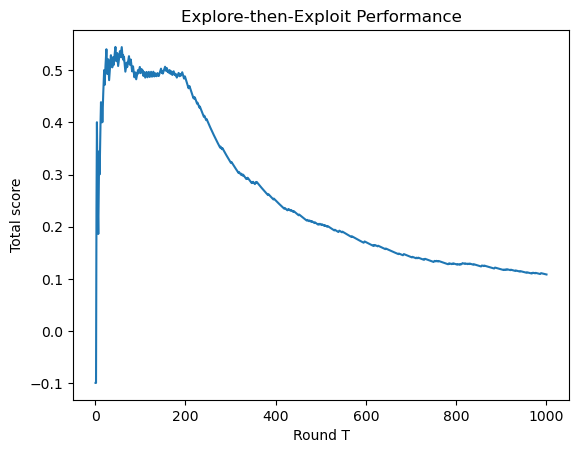

In [1]:
# import modules 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import random
k = 10    #number of arms
T = 1000  #horizon  
N = 20    #explore rounds
bandit = np.random.random((k,)) #success prob. for each arm
best = np.amax(bandit) #best arm
print('best arm = %d' %np.argmax(bandit))

bandit_score = np.zeros((k,)) #total score of each arm for first N rounds
pulls = np.zeros((k,)) #num of arm pulls
inst_score = np.zeros((T,)) #reward for round t
best_score = np.zeros((T,)) #cumulative reward of best arm for round t
alg_score = np.zeros((T,)) #cumulative reward for round t
regret =  np.zeros((T,)) #regret for round t

#this code properly activates each arm in round robin, for a total of N times

for i in range(N):
  for j in range(k):
    score = np.random.binomial(1,p=bandit[j])  #get a reward for arm j
    inst_score[i*k+j] = score  #record reward of algorithm (during explore) at that instant
    bandit_score[j] += score  #update the total score (during explore) of arm j
for i in range(k):
  print('arm = %d: true mean = %f : sample mean = %f' % (i,bandit[i],bandit_score[i]/N))
  






# the following code activates each arm N times in a row instead

"""

for i in range(k):
  score = np.random.binomial(size=N,n=1,p=bandit[i])
  inst_score[i*N:((i+1)*N)] = score
# print(score)
  #print(score.mean())
  bandit_score[i] = score.mean()
  print(bandit_score[i])
    #print('arm = %d: score = %d' % (arm,score[0]))
"""

arm = np.argmax(bandit_score/N)  #get id of best arm (during explore)


for i in range(N*k,T):
  inst_score[i] = np.random.binomial(1,p=bandit[arm])  #play best arm for the remainder of the horizon
#print(inst_score)
for i in range(T):
  if i > 0: best_score[i] = best_score[i-1] + best #vector keeping track of t*optimal reward (cummulative reward)
  else: best_score[i] = best
  if i > 0: alg_score[i] = alg_score[i-1] + inst_score[i] #vector keeping track of cummulative explore-then-eploit reward at all times 
  else: alg_score[i] = inst_score[i]
  regret[i] = (best_score[i] - alg_score[i])/(i+1)  #regret per iteration at round t

plt.title("Explore-then-Exploit Performance") 
plt.xlabel("Round T") 
plt.ylabel("Total score") 
plt.plot(np.arange(1,T+1),regret) 
plt.show()




